In [36]:
import numpy as np 
import pandas as pd

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [38]:
import os
print(os.listdir('./data/'))

['american_sign_language.png', 'amer_sign2.png', 'amer_sign3.png', 'K.jpg', 'sign_mnist_test.csv', 'sign_mnist_train.csv']


In [39]:
sign_train = pd.read_csv("./data/sign_mnist_train.csv")
sign_test = pd.read_csv("./data/sign_mnist_test.csv")

In [40]:
sign_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [41]:
sign_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


c:\Users\y2kjd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


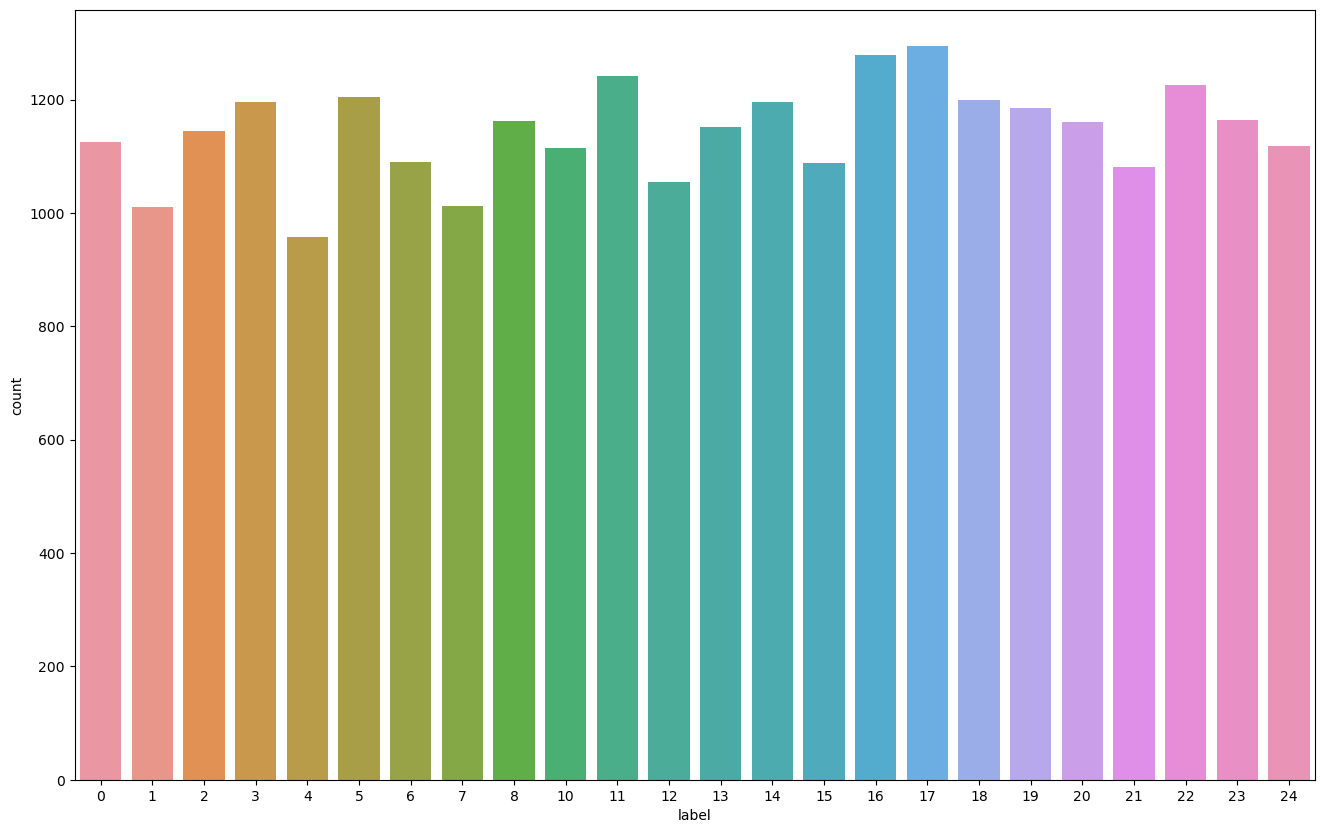

In [42]:
# 카운트플롯으로 데이터 도식 확인하기
# 이 데이터는 뭐하는 건데?
# 출력값인 라벨값을 기준으로 데이터가 얼마나 들어있는지 확인 할 수 있다.

# 이 데이터는 왜 보는걸까?
# 하나의 라벨에는 얼마만큼의 데이터가 들어있으며 대강의 수치를 파악하는데 사용한다고 생각한다

plt.figure(figsize=(16, 10))
sns.countplot(sign_train['label'])
plt.show()

In [43]:
# 각 데이터셋에 들어갈 x, y값 선언
# x값
# 입력값 x는 28*28크기 픽셀에 들어있는 색값이 필요하다
# 라벨 + 색값이 들어있는 train/test table에서 label을 제거한다

# y값
# 출력값 y는 사진의 색값을 모두 취합해 무슨 알파벳인지 알려주기 위한 라벨값이 필요하다
# 라벨 + 색값이 들어있는 train/test table에서 label만을 가져온다

In [44]:
# csv 파일 -> numpy array 선언
# 데이터 학습 모델을 만들기 위해서는 입출력 값을 numpy array 형태로 만들어줘야 한다.
# float32비트 형태로 만드는 작업 또한 필요하다

# x, y_train shape 출력하기
# x_train.shape
# 28*28 사진의 색값을 일렬로 정렬한 784개의 열(column)
# 784개의 열로 구성된 데이터가 27455개의 행(row)이 있음

# y_train.shape
# 사진의 이름을 가리키는 라벨값을 1개의 열(column)
# 1개의 열로 구성된 데이터가 7172개의 행(row)이 있음

train_df = sign_train.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = sign_test.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 784) (27455, 1)
(7172, 784) (7172, 1)


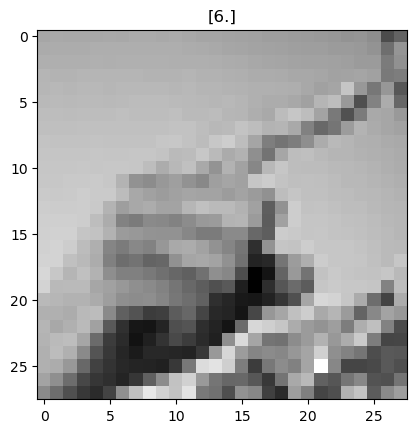

In [45]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

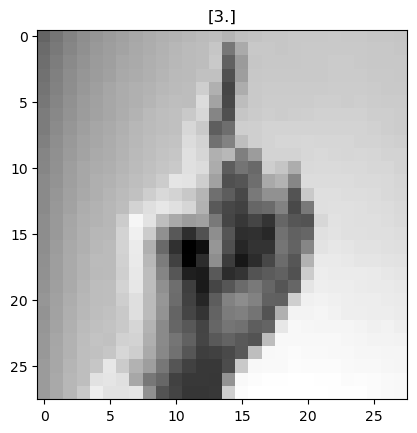

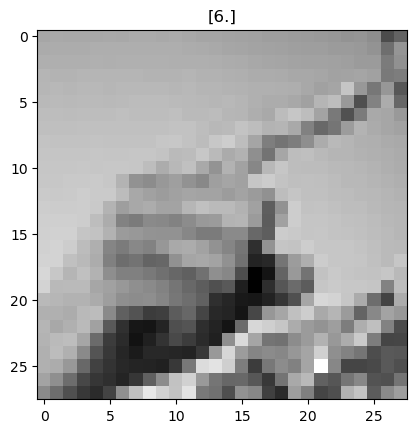

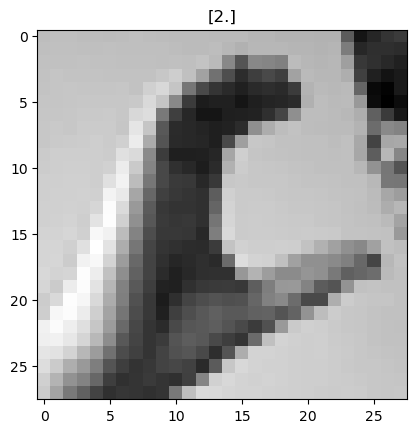

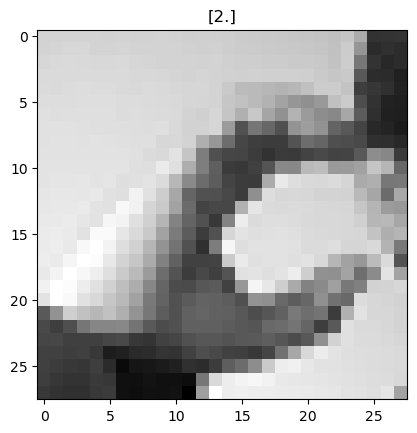

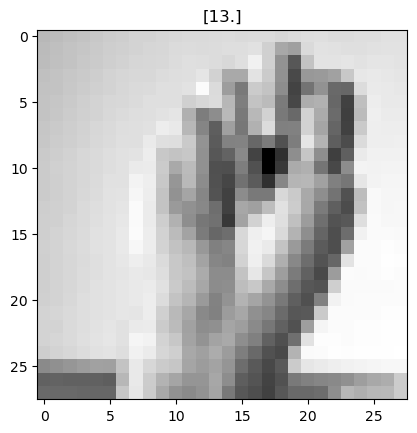

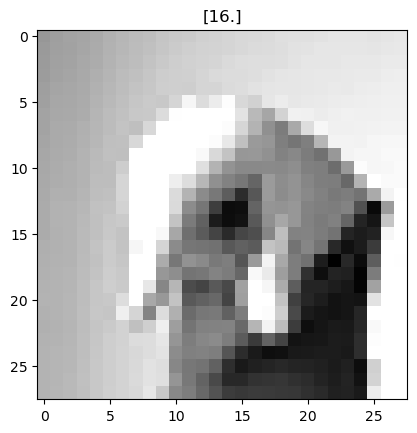

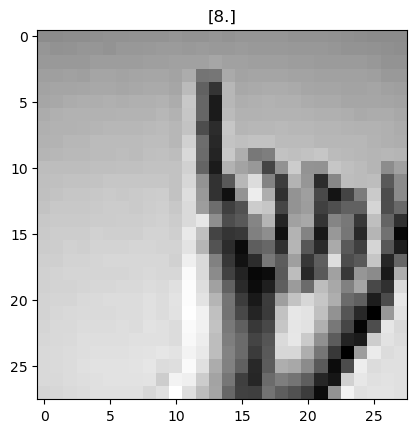

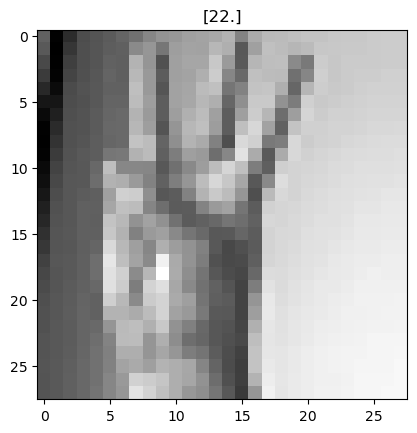

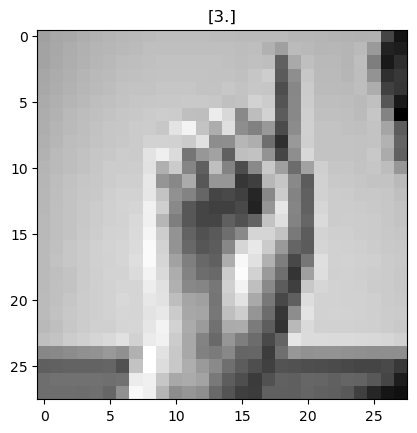

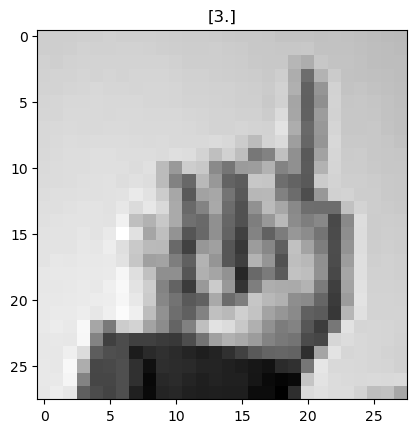

In [46]:
# 학습데이터 x_train 이미지 10개를 출력하는 코드 작성하기

for i in range(10):
    plt.title(str(y_train[i]))
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')
    plt.show()

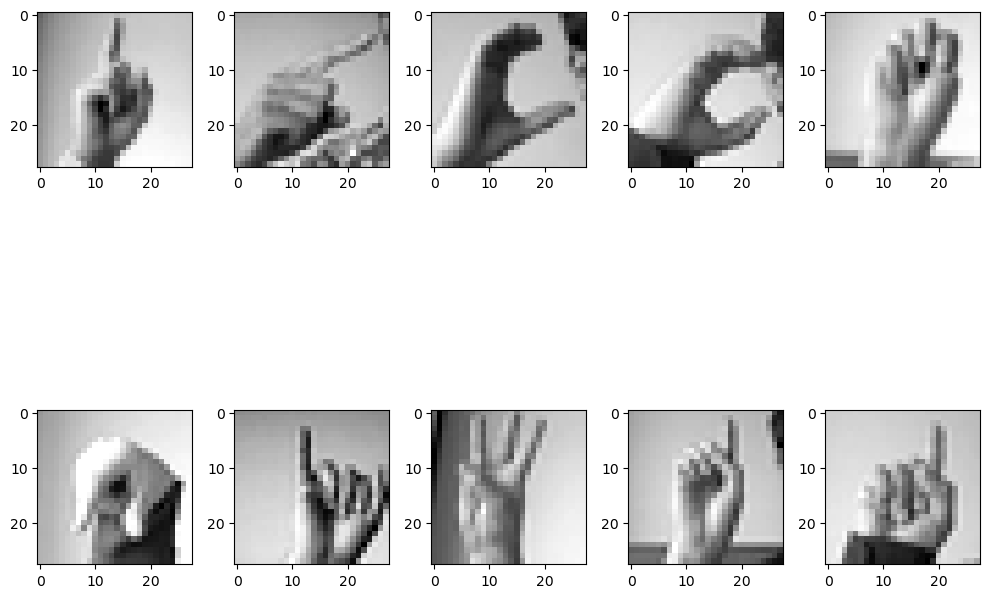

In [47]:
# plt.subplots를 사용하면 이미지를 정렬하여 작은 화면으로 간단하게 확인할 수 있다!

# using subplots
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
plt.tight_layout()

In [48]:
print(y_train.shape)

(27455, 1)


In [49]:
print( y_train[0].shape )

(1,)


In [50]:
print( y_train[0])

[3.]


In [51]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

In [52]:
# x값의 크기가 24 이기 때문에 1부터 24가 될 수 있도록 y값의 크기가 24의 행렬만큼 커졌다!
print(y_train.shape)

(27455, 24)


In [53]:
# x값의 크기가 24 이기 때문에 1부터 24가 될 수 있도록 y값의 크기가 24의 행렬만큼 커졌다!
print(y_train[0].shape)

(24,)


In [54]:
# 아까 라벨 값이 3이라고 했으니까 그에 맞게 바뀌어진 모습이다!
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [55]:
# 정규화

# 255로 나눠주는 이유는?

# 정규화를 위해서는 각 데이터들을 해당 데이터 셋이 가질 수 있는 값의 범위로 나눠주면 된다.

# X_train의 경우 한 픽셀이 0~255사이의 값을 가질 수 있으므로 255로 나눠준다.

x_train = x_train / 255.
x_test = x_test / 255.

In [56]:
#  x데이터는 28*28 크기의 값을 갖는다
print(x_test[0].shape)

(784,)


In [57]:
# x데이터는 모델에 넣어주기 위해 np.array 형식의 값을 갖고 있다.
print(type(x_test[0]))

<class 'numpy.ndarray'>


In [58]:
# x데이터는 모델에 넣어주기 위해 32비트 실수 형식의 값을 갖고 있다.

# 32비트 실수 : [0.15648954956...]

print(x_test[0].dtype)

float32


In [59]:
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(24, activation='relu')(hidden)

model1 = Model(inputs=input, outputs=output)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [60]:
# 이게뭔데? : 각 덴스레이어에서 학습할 파라미터의 값 약 140 여 만개
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_35 (Dense)            (None, 1024)              803840    
                                                                 
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 24)                6168      
                                                                 
Total params: 1,466,136
Trainable params: 1,466,136
Non-trainable params: 0
_________________________________________________________________


In [61]:
# 이게뭔데? : 무슨 모델인데 모델이 뭐야? 알려주려고 function 모델로 변경???

func_model = Model(inputs=input, outputs=output, name='FuncModel')

In [62]:
# 이게뭔데? : 플롯_모델 라이브러리를 임포트 해서 모델의 생김새를 이미지로 한 눈에 볼 수 있게 만들 준비!

from tensorflow.keras.utils import plot_model

In [63]:
# 이게뭔데? : 모델을 넣어 이미지로 보여주기!

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [64]:
# import torch
# import torch.nn as nn

# input = Input(shape=(784,))
# hidden = Dense(256, activation='relu')(input)
# hidden = Dense(512, activation='relu')(hidden)
# hidden = Dense(1024, activation='relu')(hidden)
# hidden = Dense(512, activation='relu')(hidden)
# hidden = Dense(256, activation='relu')(hidden)
# # hidden = nn.Dropout(rate_drop=0.5)(hidden)
# output = Dense(24, activation='softmax')(hidden)

# model2 = Model(inputs=input, outputs=output)

# model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])